In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ovr = pd.read_csv("overall_stat3.csv")
ovr

,Unnamed: 0,cat,mild_mean,moderate_mean,normal_mean,severe_mean,ovr_mean,std,var_coeff
0,25,PulseRate,0.377069,0.356970,0.496620,0.531899,0.440640,0.075007,0.170222
1,18,SpO2,0.576711,0.709976,0.629463,0.785802,0.675488,0.079426,0.117582
2,12,ECG I,0.454889,0.500012,0.410451,0.532738,0.474523,0.046177,0.097313
3,19,Pleth,0.440296,0.383883,0.494423,0.427019,0.436405,0.039458,0.090416
4,27,ECG IIHF,0.569490,0.482082,0.469068,0.476839,0.499369,0.040748,0.081599
5,0,EEG F3-A2,0.490459,0.492597,0.412699,0.492240,0.471999,0.034246,0.072556
6,14,ECG II,0.555127,0.477339,0.469427,0.488292,0.497546,0.033913,0.068160
7,16,Effort THO,0.410677,0.491822,0.441003,0.466929,0.452607,0.030148,0.066611
8,17,Effort ABD,0.456074,0.486243,0.423029,0.411104,0.444112,0.029377,0.066149
9,15,Snore,0.493696,0.531497,0.467381,0.508569,0.500286,0.023285,0.046544


In [101]:
import mne
import numpy as np
import pandas as pd
from scipy.signal import decimate

def read_edf(file_path):
    
    raw = mne.io.read_raw_edf(file_path, preload=True)
    data, times = raw.get_data(return_times=True)
    df_normal1 = pd.DataFrame(data.T, columns=raw.ch_names)
    df_normal = pd.DataFrame()
    df_normal1 = df_normal1.fillna(df_normal1.mean())
    for col in df_normal1.columns:
        downsample_factor = 1000  # Since you want 1 value per second (0.1 * 10 = 1 second)
        downsampled_values = decimate(df_normal1[col], downsample_factor)
        df_normal[col] = downsampled_values
    
    return df_normal

In [109]:
df_mild = pd.DataFrame()

file_path = r'Mild-20240823T063600Z-001\Mild\00000067-297469\00000067-297469[001].edf'
df_normal1 = read_edf(file_path)
print("Done")

file_path = r'Mild-20240823T063600Z-001\Mild\00000067-297469\00000067-297469[002].edf'
df_normal2 = read_edf(file_path)
print("done")
file_path = r'Mild-20240823T063600Z-001\Mild\00000067-297469\00000067-297469[003].edf'
df_normal3 = read_edf(file_path)
print("done")

file_path = r'Mild-20240823T063600Z-001\Mild\00000067-297469\00000067-297469[004].edf'
df_normal4 = read_edf(file_path)
print("done")

file_path = r'Mild-20240823T063600Z-001\Mild\00000067-297469\00000067-297469[005].edf'
df_normal5 = read_edf(file_path)
print("done")

file_path = r'Mild-20240823T063600Z-001\Mild\00000067-297469\00000067-297469[006].edf'
df_normal6 = read_edf(file_path)
print("done")

file_path = r'Mild-20240823T063600Z-001\Mild\00000067-297469\00000067-297469[007].edf'
df_normal7 = read_edf(file_path)
print("done")

file_path = r'Mild-20240823T063600Z-001\Mild\00000067-297469\00000067-297469[008].edf'
df_normal8 = read_edf(file_path)
print("done")









Extracting EDF parameters from c:\Users\shau\Downloads\DH 604\Mild-20240823T063600Z-001\Mild\00000067-297469\00000067-297469[001].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3599999  =      0.000 ...  3599.999 secs...


C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Done
Extracting EDF parameters from c:\Users\shau\Downloads\DH 604\Mild-20240823T063600Z-001\Mild\00000067-297469\00000067-297469[002].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3599999  =      0.000 ...  3599.999 secs...


C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)


done
Extracting EDF parameters from c:\Users\shau\Downloads\DH 604\Mild-20240823T063600Z-001\Mild\00000067-297469\00000067-297469[003].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3599999  =      0.000 ...  3599.999 secs...


C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)


done
Extracting EDF parameters from c:\Users\shau\Downloads\DH 604\Mild-20240823T063600Z-001\Mild\00000067-297469\00000067-297469[004].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3599999  =      0.000 ...  3599.999 secs...


C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)


done
Extracting EDF parameters from c:\Users\shau\Downloads\DH 604\Mild-20240823T063600Z-001\Mild\00000067-297469\00000067-297469[005].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3599999  =      0.000 ...  3599.999 secs...


C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)


done
Extracting EDF parameters from c:\Users\shau\Downloads\DH 604\Mild-20240823T063600Z-001\Mild\00000067-297469\00000067-297469[006].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3599999  =      0.000 ...  3599.999 secs...


C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)


done
Extracting EDF parameters from c:\Users\shau\Downloads\DH 604\Mild-20240823T063600Z-001\Mild\00000067-297469\00000067-297469[007].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3599999  =      0.000 ...  3599.999 secs...


C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)


done
Extracting EDF parameters from c:\Users\shau\Downloads\DH 604\Mild-20240823T063600Z-001\Mild\00000067-297469\00000067-297469[008].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3599999  =      0.000 ...  3599.999 secs...


C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)


done


In [110]:
df_mild = pd.concat([df_normal1, df_normal2, df_normal3, df_normal4, df_normal5, df_normal6, df_normal7, df_normal8])

In [113]:
df_severe.to_csv("severe_decimate_final.csv")

In [112]:
df_severe = pd.DataFrame()

file_path = r'severe-20240823T064005Z-001\severe\00000066-297469\00000066-297469[001].edf'
df_normal1 = read_edf(file_path)
print("done")

file_path = r'severe-20240823T064005Z-001\severe\00000066-297469\00000066-297469[002].edf'
df_normal2 = read_edf(file_path)
print("done")
file_path = r'severe-20240823T064005Z-001\severe\00000066-297469\00000066-297469[003].edf'
df_normal3 = read_edf(file_path)
print("done")

file_path = r'severe-20240823T064005Z-001\severe\00000066-297469\00000066-297469[004].edf'
df_normal4 = read_edf(file_path)
print("done")

file_path = r'severe-20240823T064005Z-001\severe\00000066-297469\00000066-297469[005].edf'
df_normal5 = read_edf(file_path)
print("done")

file_path = r'severe-20240823T064005Z-001\severe\00000066-297469\00000066-297469[006].edf'
df_normal6 = read_edf(file_path)
print("done")

file_path = r'severe-20240823T064005Z-001\severe\00000066-297469\00000066-297469[007].edf'
df_normal7 = read_edf(file_path)
print("done")

df_severe = pd.concat([df_normal1, df_normal2, df_normal3, df_normal4, df_normal5, df_normal6, df_normal7])







Extracting EDF parameters from c:\Users\shau\Downloads\DH 604\severe-20240823T064005Z-001\severe\00000066-297469\00000066-297469[001].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3599999  =      0.000 ...  3599.999 secs...


C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)


done
Extracting EDF parameters from c:\Users\shau\Downloads\DH 604\severe-20240823T064005Z-001\severe\00000066-297469\00000066-297469[002].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3599999  =      0.000 ...  3599.999 secs...


C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)


done
Extracting EDF parameters from c:\Users\shau\Downloads\DH 604\severe-20240823T064005Z-001\severe\00000066-297469\00000066-297469[003].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3599999  =      0.000 ...  3599.999 secs...


C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)


done
Extracting EDF parameters from c:\Users\shau\Downloads\DH 604\severe-20240823T064005Z-001\severe\00000066-297469\00000066-297469[004].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3599999  =      0.000 ...  3599.999 secs...


C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)


done
Extracting EDF parameters from c:\Users\shau\Downloads\DH 604\severe-20240823T064005Z-001\severe\00000066-297469\00000066-297469[005].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3599999  =      0.000 ...  3599.999 secs...


C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)


done
Extracting EDF parameters from c:\Users\shau\Downloads\DH 604\severe-20240823T064005Z-001\severe\00000066-297469\00000066-297469[006].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3599999  =      0.000 ...  3599.999 secs...


C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)


done
Extracting EDF parameters from c:\Users\shau\Downloads\DH 604\severe-20240823T064005Z-001\severe\00000066-297469\00000066-297469[007].edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3599999  =      0.000 ...  3599.999 secs...


C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'Flow Patient'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\shau\AppData\Local\Temp\ipykernel_14676\4039457152.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True)


done


In [46]:
df_mild.shape, df_moderate.shape, df_normal.shape, df_severe.shape

((28800, 30), (28800, 30), (28800, 30), (25200, 30))

In [20]:
df_mild.to_csv("mild_decimated.csv")
df_severe.to_csv("severe_decimated.csv")
df_normal.to_csv("normal_decimated.csv")
df_moderate.to_csv("moderate_decimated.csv")


In [61]:

df_mild= df_mild.reset_index(drop=True)
df_severe = df_severe.reset_index(drop=True)
df_moderate= df_moderate.reset_index(drop=True)
df_normal = df_normal.reset_index(drop=True)

# Run cells from here

In [115]:
import pandas as pd

def apnea_points(df, column_name):
    cumulative_sum = 0
    count = 0
    previous_mean = None
    points_of_decrease = []
    i = 0

    while i < len(df):
        # Update cumulative sum and count
        cumulative_sum += df[column_name].iloc[i]
        count += 1
     
        current_mean = cumulative_sum / count
        
        if previous_mean is not None:
            if df[column_name].iloc[i] <= 0.1 * previous_mean:
                # Check the next 10 points to see if the cumulative mean holds
                subset = df[column_name].iloc[i+1:i+10].values
                if len(subset) < 9:
                    break  # If there aren't enough points left, break early
                
                add = True
                c_sum = cumulative_sum
                c = count
                for j in range(len(subset)):
                    c += 1
                    c_sum += subset[j]
                    if subset[j] > 0.1 * previous_mean:
                       
                        add = False
                        break
                
                if add:
                    points_of_decrease.append(i)
                    
                    j=i+10
                    crr = 0.1*previous_mean
                    if j<len(df):
                        crr = df[column_name].iloc[j]
                

                    while (crr <0.1*previous_mean):
                        count+=1
                        cumulative_sum+= crr
                        i+=1
                        j+=1
                        crr = 0.1*previous_mean + 1
                        if j<len(df):

                            crr= df[column_name].iloc[j]
                         
                        


                    # Skip the next 10 points
                    cumulative_sum += subset.sum()  # Adjust cumulative sum for skipped rows
                    count += len(subset)
                    i += len(subset)  # Skip ahead by 10 data points

        # Update previous mean
        previous_mean = current_mean
        
        # Move to the next row
        i += 1

    return points_of_decrease


In [116]:
import pandas as pd

def hypoapnea_points(df, column_name,  column_name2):
    cumulative_sum = 0
    cumulative_sum2= 0
    count2 = 0
    previous_mean2 =0
    count = 0
    previous_mean = None
    points_of_decrease = []
    i = 0

    while i < len(df):
        # Update cumulative sum and count
        cumulative_sum += df[column_name].iloc[i]
        count += 1
        cumulative_sum2 += df[column_name2].iloc[i]
        count2 += 1
     
        current_mean = cumulative_sum / count
        current_mean2 = cumulative_sum2 / count2

        
        if previous_mean is not None:
            if (df[column_name].iloc[i] <= 0.7 * previous_mean) and previous_mean2-df[column_name2].iloc[i] <=0.97*previous_mean2:
                # Check the next 10 points to see if the cumulative mean holds
                subset = df[column_name].iloc[i+1:i+10].values
                subset2 = df[column_name2].iloc[i+1:i+10].values

                if len(subset) < 9:
                    break  # If there aren't enough points left, break early
                
                add = True
                c_sum = cumulative_sum
                c = count
                for j in range(len(subset)):
                    c += 1
                    c_sum += subset[j]
                    if subset[j] > 0.7 * previous_mean or previous_mean2- subset2[j] >0.97*previous_mean2:
                       
                        add = False
                        break
                
                if add:
                    points_of_decrease.append(i)
             
                    j=i+10
                    crr=0.7*previous_mean
                    crr2= 0.7*previous_mean
                    if j<len(df):
                        crr = df[column_name].iloc[j]
                        crr2 = df[column_name2].iloc[j]

                    while (crr <0.7*previous_mean):
                        count+=1
                        cumulative_sum+= crr
                        count2+=1
                        cumulative_sum2+= crr2
                        i+=1
                        j+=1
                        if j<len(df):

                            crr= df[column_name].iloc[j]
                            crr2= df[column_name2].iloc[j]

                        else:
                            crr = 0.7*previous_mean
                          
                        
                        


                    # Skip the next 10 points
                    cumulative_sum += subset.sum()  # Adjust cumulative sum for skipped rows
                    count += len(subset)
                    cumulative_sum2 += subset2.sum()  # Adjust cumulative sum for skipped rows
                    count2 += len(subset2)
                    i += len(subset)  # Skip ahead by 10 data points

        # Update previous mean
        previous_mean = current_mean
        previous_mean2 = current_mean2

        
        # Move to the next row
        i += 1

    return points_of_decrease




In [92]:
df_normal.columns

Index(['Unnamed: 0', 'EEG F3-A2', 'EEG F4-A1', 'EEG A1-A2', 'EEG C3-A2',
       'EEG C4-A1', 'EEG O1-A2', 'EEG O2-A1', 'EOG LOC-A2', 'EOG ROC-A2',
       'EMG Chin', 'Leg 1', 'Leg 2', 'ECG I', 'RR', 'ECG II', 'Snore',
       'Flow Patient-0', 'Flow Patient-1', 'Effort THO', 'Effort ABD', 'SpO2',
       'Pleth', 'Body', 'Flow Patient-2', 'xPAP CPAP', 'xPAP IPAP',
       'xPAP EPAP', 'Leak Total', 'PulseRate', 'PressCheck', 'ECG IIHF',
       'Technical', 'time'],
      dtype='object')

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
%cd ..

c:\Users\shau\Downloads\DH 604


In [122]:
df_mild = pd.read_csv("mild_decimate_final.csv")
df_moderate = pd.read_csv("moderate_decimate_final.csv")
df_normal = pd.read_csv("normal_decimate_final.csv")
df_severe = pd.read_csv("severe_decimate_final.csv")

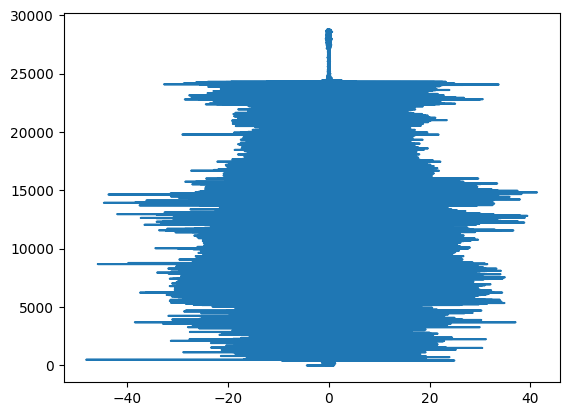

In [125]:
df_mild["time"] =df_mild.index
plt.plot(df_mild["Flow Patient-0"],df_mild["time"])

In [112]:
df_severe["time"] = df_severe.index
severe_apnea = apnea_points(df_severe, "Flow Patient-1")
print("done")

df_mild["time"] = df_mild.index
mild_apnea = apnea_points(df_mild, "Flow Patient-1")
print("done")

df_moderate["time"] = df_moderate.index
moderate_apnea = apnea_points(df_moderate, "Flow Patient-1")
print("done")

df_normal["time"] = df_normal.index
normal_apnea = apnea_points(df_normal[23000:24000], "Flow Patient-1")

done
done
done


In [101]:
df_severe["time"] = df_severe.index
severe_hypoapnea = hypoapnea_points(df_severe, "Flow Patient-0", "SpO2")

df_mild["time"] = df_mild.index
mild_hypoapnea = hypoapnea_points(df_mild, "Flow Patient-0", "SpO2")

df_moderate["time"] = df_moderate.index
moderate_hypoapnea = hypoapnea_points(df_moderate, "Flow Patient-0", "SpO2")

df_normal["time"] = df_normal.index
normal_hypoapnea = hypoapnea_points(df_normal, "Flow Patient-0", "SpO2")

In [113]:
len(severe_apnea), len(mild_apnea), len(moderate_apnea), len(normal_apnea)

(25, 19, 121, 32)

In [102]:
len(severe_hypoapnea), len(mild_hypoapnea), len(moderate_hypoapnea), len(normal_hypoapnea)

(49, 78, 187, 1)

In [104]:
API_index = [(len(severe_apnea)+ len(severe_hypoapnea))/14, (len(mild_hypoapnea)+ len(mild_apnea))/16, (len(moderate_hypoapnea)+ len(moderate_apnea))/16, (len(normal_hypoapnea)+ len(normal_apnea))/16]
API_index

[5.285714285714286, 6.0625, 19.25, 2.0625]

In [20]:
ovr = pd.read_csv("overall_stat2.csv")
ovr

,Unnamed: 0,category,mild_mean,moderate_mean,normal_mean,severe_mean,ovr_mean,std,var_coeff
0,2,EEG A1-A2,-0.000367,9.834159e-08,-3.541354,0.057627,-0.871023,1.541897,1.770213
1,19,Pleth,-0.000979,-1.986151e-03,-1.118041,-0.001893,-0.280725,0.483425,1.722059
2,15,Snore,-0.008972,-8.871492e-03,-1.125504,-0.008969,-0.288079,0.483487,1.678314
3,16,Effort THO,-0.025802,-7.494310e-03,-1.125573,-0.007366,-0.291559,0.481577,1.651732
4,17,Effort ABD,-0.032403,-7.275140e-03,-1.132637,-0.007207,-0.294881,0.483788,1.640623
5,10,Leg 1,-0.098805,-9.846003e-08,-0.968277,-0.095566,-0.290662,0.393229,1.352875
6,0,EEG F3-A2,-6.141882,-4.634524e-06,-54.650278,-4.857867,-16.412508,22.195117,1.352329
7,9,EMG Chin,-0.092729,-9.838588e-08,-0.969491,-0.130633,-0.298213,0.390465,1.309350
8,11,Leg 2,-0.120541,-1.202112e-07,-0.990393,-0.120162,-0.307774,0.397161,1.290430
9,27,ECG IIHF,-18.814428,-1.778525e-05,-118.836785,-18.420807,-39.018009,46.706183,1.197042


In [22]:
imp_cols = ovr["category"][:16]

# What happens near apnea points ?

In [35]:
%cd variation across apnea and hypoapnea points

c:\Users\shau\Downloads\DH 604\variation across apnea and hypoapnea points


In [57]:
import matplotlib.pyplot as plt
import math
import os

def plot_variations(df, timepoints, save_dir,  ncols=5):
    for col in imp_cols:
        # Define the number of rows and columns for the subplot grid
        nrows = math.ceil(len(timepoints) / ncols)  # Calculate required rows based on timepoints
        fig, axs = plt.subplots(nrows, ncols, figsize=(16, 16))
        fig.suptitle(f'Variation of {col} across all timepoints for {save_dir}', fontsize=16)

        # Flatten axs if it's a 2D array for easier indexing
        axs = axs.flatten() if len(timepoints) > 1 else [axs]

        for i, x in enumerate(timepoints):
            start = max(0, x - 100)
            end = min(len(df) - 1, x + 100)

            window_df = df[(df['time'] >= start) & (df['time'] <= end)]

            axs[i].plot(window_df['time'], window_df[col], label=f'timepoint {x}')
            axs[i].set_title(f"Timepoint {x}")
            axs[i].set_xlabel('Time')
            axs[i].set_ylabel(col)
            axs[i].legend()

        # Hide any unused subplots
        for j in range(len(timepoints), len(axs)):
            fig.delaxes(axs[j])  # Remove unused axes

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plot_filename = os.path.join(save_dir, f"{col}_variations_apnea.png")
        plt.savefig(plot_filename, bbox_inches='tight')  # Save the figure to the specified path
        plt.close(fig)  # Adjust layout to include the main title
        plt.show()


In [107]:
normal_apnea

[23251,
 23261,
 23271,
 23281,
 23291,
 23301,
 23311,
 23321,
 23331,
 23341,
 23351,
 23361,
 23371,
 23381,
 23391,
 23401,
 23411,
 23421,
 23431,
 23441,
 23451,
 23461,
 23471,
 23481,
 23491,
 23501,
 23511,
 23521,
 23531,
 23541,
 23551,
 23561]

In [43]:
plot_variations(df_mild, mild_apnea, "mild")
plot_variations(df_moderate, moderate_apnea, "moderate")
plot_variations(df_severe, severe_apnea, "severe")

In [109]:
plot_variations(df_normal, normal_apnea[10:20], "normal")